* 데이터 출처: https://www.kaggle.com/andrewmvd/data-analyst-jobs

In [286]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [287]:
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## data load

In [288]:
df=pd.read_csv("data/dataanalyst/dataanalyst.csv")
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [289]:
df=df.drop('Unnamed: 0',axis=1)

## data shape

In [290]:
df.shape

(2253, 15)

In [291]:
# 데이터 타입과 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 15 columns):
Job Title            2253 non-null object
Salary Estimate      2253 non-null object
Job Description      2253 non-null object
Rating               2253 non-null float64
Company Name         2252 non-null object
Location             2253 non-null object
Headquarters         2253 non-null object
Size                 2253 non-null object
Founded              2253 non-null int64
Type of ownership    2253 non-null object
Industry             2253 non-null object
Sector               2253 non-null object
Revenue              2253 non-null object
Competitors          2253 non-null object
Easy Apply           2253 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 264.1+ KB


In [292]:
# 숫자타입 컬럼의 통계요약 
# 평점 평균: 3.1
# 설립일 평균: 1398 (아웃라이어 예상됨, min 값 -1)
df.describe()

,Rating,Founded
count,2253.000000,2253.000000
mean,3.160630,1398.522858
std,1.665228,901.929251
min,-1.000000,-1.000000
25%,3.100000,-1.000000
50%,3.600000,1979.000000
75%,4.000000,2002.000000
max,5.000000,2019.000000


In [293]:
# object 타입 통계 요약
# 뉴욕에 있는 회사가 가장 많음
# 51 ~ 200 사이즈의 회사가 가장 많음
# 나머지 결측 많음
df.describe(include='object')

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
count,2253,2253,2253,2252,2253,2253,2253,2253,2253,2253,2253,2253,2253
unique,1272,90,2253,1513,253,483,9,15,89,25,14,291,2
top,Data Analyst,$41K-$78K (Glassdoor est.),Primary Function\n\nResponsible for assisting ...,"Staffigo Technical Services, LLC\n5.0","New York, NY","New York, NY",51 to 200 employees,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1,-1
freq,405,57,1,58,310,206,421,1273,353,570,615,1732,2173


## preproces

### 1) 결측치 처리

In [294]:
# 회사 이름 중요하지 않으니까, 남겨두자
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [295]:
# salary estimate 값이 -1 로 들어가 있는 row 는 필요없으니까 삭제
df[df['Salary Estimate'].str.contains('-1')]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
2149,Configuration/Data Management Analyst III,-1,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA","Bellevue, WA",51 to 200 employees,2001,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),-1,-1


In [296]:
print(df.shape)
df=df.drop(index=2149).reset_index().drop('index',axis=1)
print(df.shape)

(2253, 15)
(2252, 15)


In [297]:
#다른 컬럼에도 결측치 있지만, 전체 데이터가 적고 중요한건 salary 니까 분석하면서 필요한 경우에 제외시켜주자

### 2) Job Title 정리

In [298]:
# 총 1271개의 job name이 있는데, 간추려보자
df['Job Title'].nunique()

1271

In [299]:
df['Job Title'].value_counts()

Data Analyst                                                                       405
Senior Data Analyst                                                                 90
Junior Data Analyst                                                                 30
Business Data Analyst                                                               28
Sr. Data Analyst                                                                    21
                                                                                  ... 
Technical Business Analyst (SQL, Data analytics, Informatica)                        1
Information Systems Officer (Data Analyst)                                           1
Data Analyst-Junior Profiles also works-Only NY/NJ Candidates Please on w2 Only      1
Associate Player Support Data Analyst                                                1
Data Analyst, Transaction Monitoring                                                 1
Name: Job Title, Length: 1271, dtype: int64

In [300]:
# Job Title에 Senior, Junior 포함 여부에 따라서 연봉이 달라질 수 있을 것 같다. 분류해보자

In [301]:
df.loc[df['Job Title'].str.contains('Junior|junior|JUNIOR|Jr'),'rank'] = 'Junior'
df.loc[df['Job Title'].str.contains('Senior|senior|SENIOR|Sr'),'rank'] = 'Senior'
df.loc[df['Job Title'].str.contains('expert|Expert|EXPERT'),'rank'] = 'Expert'

In [302]:
df.loc[~df['rank'].isnull(),['Job Title','rank']]

,Job Title,rank
2,"Senior Data Analyst, Insights & Analytics Team...",Senior
13,Senior Data Analyst,Senior
24,Entry Level / Jr. Data Analyst,Junior
49,"Senior Analyst, Data Science",Senior
50,"Senior Data Analyst, Disney+",Senior
...,...,...
2237,Senior Contract Data Analyst,Senior
2238,Senior Contract Data Analyst,Senior
2243,"Data Security Analyst, Sr",Senior
2248,Senior Data Analyst (Corporate Audit),Senior


### 3) Salary 정리

In [303]:
# salary가 범위로 되어 있으며 중구난방임
df['Salary Estimate'].unique()

array(['$37K-$66K (Glassdoor est.)', '$46K-$87K (Glassdoor est.)',
       '$51K-$88K (Glassdoor est.)', '$51K-$87K (Glassdoor est.)',
       '$59K-$85K (Glassdoor est.)', '$43K-$76K (Glassdoor est.)',
       '$60K-$110K (Glassdoor est.)', '$41K-$78K (Glassdoor est.)',
       '$45K-$88K (Glassdoor est.)', '$73K-$127K (Glassdoor est.)',
       '$84K-$90K (Glassdoor est.)', '$27K-$52K (Glassdoor est.)',
       '$42K-$74K (Glassdoor est.)', '$77K-$132K (Glassdoor est.)',
       '$98K-$114K (Glassdoor est.)', '$48K-$96K (Glassdoor est.)',
       '$26K-$47K (Glassdoor est.)', '$31K-$59K (Glassdoor est.)',
       '$47K-$81K (Glassdoor est.)', '$43K-$69K (Glassdoor est.)',
       '$49K-$112K (Glassdoor est.)', '$30K-$54K (Glassdoor est.)',
       '$55K-$103K (Glassdoor est.)', '$37K-$70K (Glassdoor est.)',
       '$57K-$103K (Glassdoor est.)', '$35K-$45K (Glassdoor est.)',
       '$42K-$66K (Glassdoor est.)', '$65K-$81K (Glassdoor est.)',
       '$113K-$132K (Glassdoor est.)', '$42K-$63K (Glas

글래스도어(Glassdoor)는 해당 회사 직원의 익명 리뷰에 기반한 직장 및 상사 평가 사이트이다. 2008년 미국에서 시작된 서비스로 2013년 12월 기준 2,200만 명 회원이 이용 중이며, 30만 개 회사의 데이터를 보유하고 있다.

In [304]:
df_salary=df['Salary Estimate'].str.split(' ',expand=True)[0].str.split('-',expand=True)
df_salary

,0,1
0,$37K,$66K
1,$37K,$66K
2,$37K,$66K
3,$37K,$66K
4,$37K,$66K
...,...,...
2247,$78K,$104K
2248,$78K,$104K
2249,$78K,$104K
2250,$78K,$104K


In [305]:
df=pd.concat([df,df_salary],axis=1)
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,rank,0,1
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,NaN,$37K,$66K
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,NaN,$37K,$66K
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,Senior,$37K,$66K
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,NaN,$37K,$66K
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NaN,$37K,$66K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1,NaN,$78K,$104K
2248,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1,Senior,$78K,$104K
2249,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1,NaN,$78K,$104K
2250,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1,NaN,$78K,$104K


In [306]:
# 새로만든 컬럼 앞으로 빼주기
col1=df.columns[-3:].to_list()
col2=df.columns[:-3].to_list()
new_col=col1+col2
df=df[new_col]
df.head()

,rank,0,1,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,NaN,$37K,$66K,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,NaN,$37K,$66K,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,Senior,$37K,$66K,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,NaN,$37K,$66K,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,NaN,$37K,$66K,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [307]:
# 컬럼명 보기 쉽게 바꿔주기 
df=df.rename(columns={0:'salary_min',1:'salary_max'})
df.head()

,rank,salary_min,salary_max,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,NaN,$37K,$66K,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,NaN,$37K,$66K,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,Senior,$37K,$66K,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,NaN,$37K,$66K,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,NaN,$37K,$66K,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [333]:
# salary 숫자만 남겨주기

In [330]:
df['salary_min']=df['salary_min'].str.split('$',expand=True)[1].str.split('K',expand=True)[0]

In [332]:
df['salary_max']=df['salary_max'].str.split('$',expand=True)[1].str.split('K',expand=True)[0]

In [338]:
df['salary_min']=df['salary_min'].astype(int)
df['salary_max']=df['salary_max'].astype(int)

In [339]:
df['salary_mean']=round((df['salary_min'] + df['salary_max']) / 2,0)

In [340]:
df['salary_range']=df['salary_max'] - df['salary_min']

In [341]:
df=df[['rank', 'salary_min', 'salary_max', 'salary_mean', 'salary_range','Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply']]

### salary 단위보기

$1K 당 1,000달러, 한화 118만원 정도임

$30K = 약 3500만원

위의 표는 연봉으로 나오는 것으로 보임

### salary min <-> salary max 차이 시각화

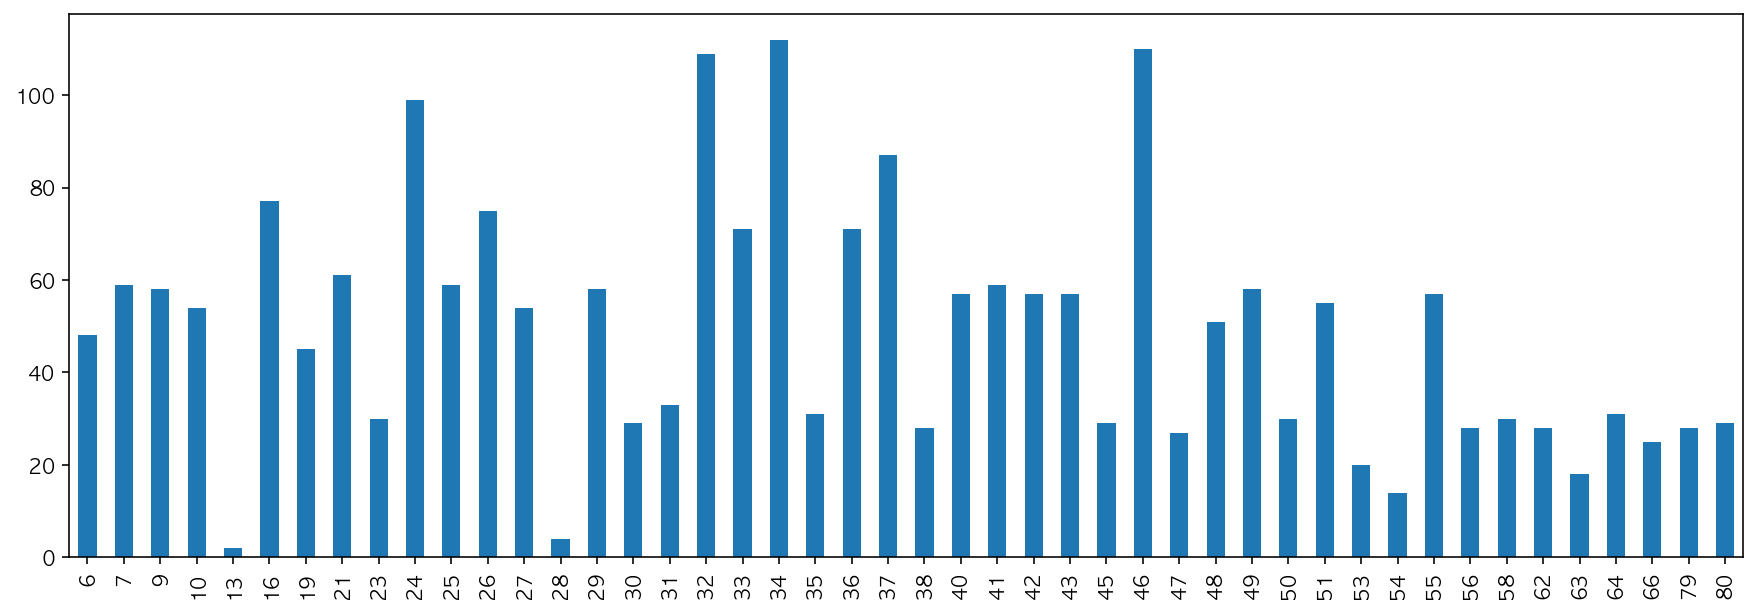

In [356]:
df['salary_range'].value_counts().sort_index().plot.bar(figsize=(15,5))